In [1]:
import numpy as np
import librosa
import librosa.display as display
import matplotlib.pyplot as plt
import IPython

In [2]:
sr = 22050

In [3]:
cd ../

/mnt/Stuff/Acads/UGP/mycode


In [4]:
stuff = np.load('nmf1/stuff_liz.npz')

WF0 = stuff['arr_0']
WGAMMA = stuff['arr_1']
psd = stuff['arr_7']

In [6]:
psd.shape[0]

1103

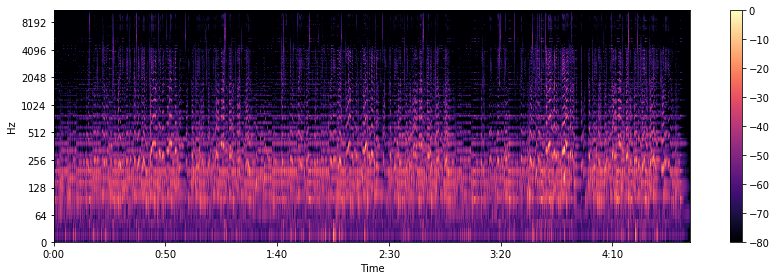

In [69]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(SX, ref=np.max),
                           y_axis='log',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

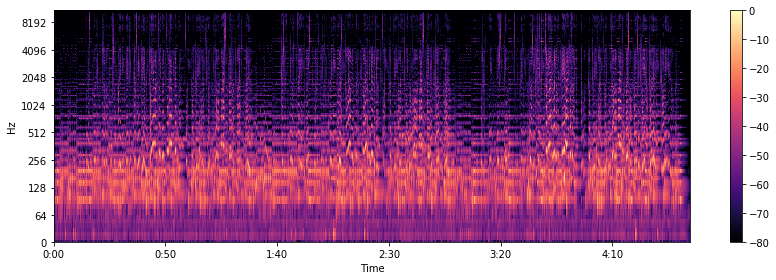

In [61]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(SX, ref=np.max),
                           y_axis='log',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

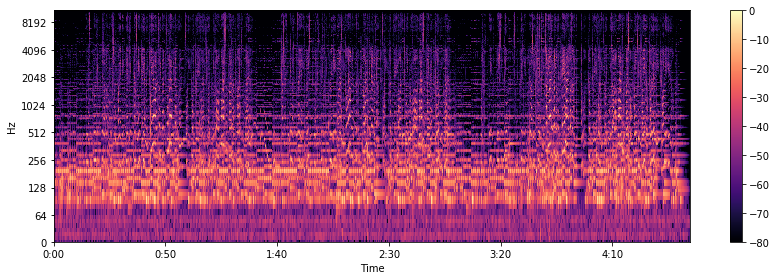

In [173]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(psd, ref=np.max),
                           y_axis='log',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

In [4]:
Ust = 5
#F = psd.shape[0]
Fmin = librosa.note_to_hz('C2')
Fmax = librosa.note_to_hz('C7')
#Fmax = 20000

In [7]:
U = int(np.log2(Fmax/Fmin) * 12*Ust +1)

In [5]:
def uf(u,Fmin,Ust):
    return Fmin * np.power(2,(u)/(12*Ust))

In [9]:
u = np.arange(U)
uf0 = uf(u,Fmin,Ust)

In [6]:
note = uf(np.arange(int(np.log2(Fmax/Fmin) * 12*1 +1)) , Fmin,1)

In [11]:
freq=librosa.fft_frequencies(sr,0.1*sr)
freq.shape

(1103,)

In [14]:
N = SX.shape[1]

In [117]:
stuff = np.load('outputs/out_liz_new_125.npz')

HGAMMA = stuff['arr_2']
HPHI = stuff['arr_3']
WM = stuff['arr_4']
HF0 = stuff['arr_5']
HM = stuff['arr_6']
SX = stuff['arr_7']

In [125]:
stuff = np.load('outputs/out_liz_new.npz')

HGAMMA = stuff['arr_2']
HPHI = stuff['arr_3']
WM = stuff['arr_4']
HF0 = stuff['arr_5']
HM = stuff['arr_6']
SX = stuff['arr_7']

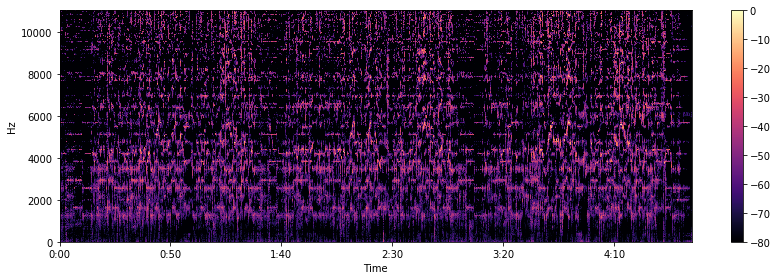

In [70]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(HF0, ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

In [126]:
fund_bad = np.zeros([U,N])
for i in range(N):
    m = np.amax(HF0[:,i])
    mi = np.argwhere(HF0[:,i] == m)
    for x in mi:
        fund_bad[x,i] = m

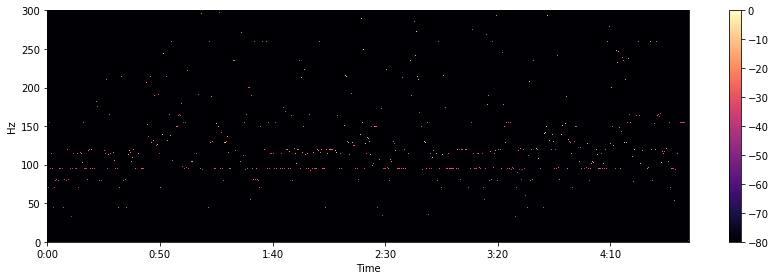

In [39]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(fund_bad, ref=np.max),y_coords=np.arange(301),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

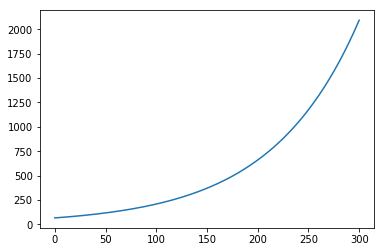

In [92]:
plt.plot(uf0)

In [14]:
Fmax

2093.004522404789

In [45]:
fund = np.zeros([U,N])
for i in range(N):
    start=0
    win = 60
    while start < 300:
        m = np.amax(HF0[start:start + win,i])
        mi = np.argwhere(HF0[start:start + win,i] == m)
        for x in mi:
            fund[start + x,i] = m
        start = start+win
            

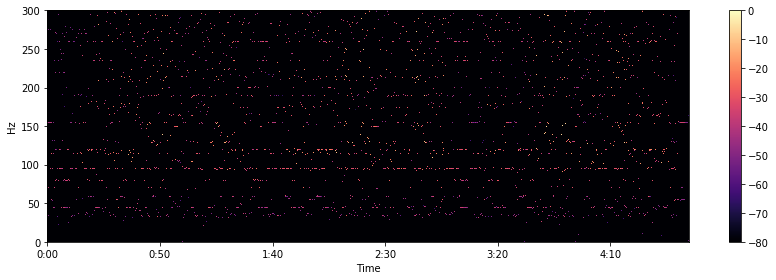

In [46]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(fund, ref=np.max),y_coords=np.arange(301),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

In [47]:
notes = np.zeros([61,N])
for j in range(N):
    start =0
    notes[0,j] = np.amax(fund[0:start+2+1,j])
    i=1
    start = i*5
    while start < 60*5:
        notes[i,j] = np.amax(fund[start-2:start+2+1,j])
        i+=1
        start = i*5
    notes[i,j] = np.amax(fund[start-2:start,j])

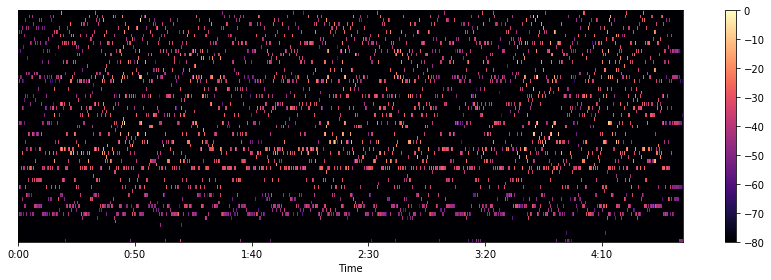

In [48]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(notes, ref=np.max),
                           x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

ground truth

In [8]:
import pandas as pd

In [9]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [30]:
liz_ground = "/mnt/Stuff/Acads/UGP/medleydb/medleydb/data/Annotations/Melody/Melody2/LizNelson_Rainfall_MELODY2.csv"
liz = pd.read_csv(liz_ground,names = ['time','freq'])
liz = liz.to_numpy()
# gt = [x[0] for x in liz]
# tot = gt[len(gt)-1]

i=0
ground_liz = np.zeros([61,N])
gl = np.zeros(N)
for x in liz:
    if i%2 ==0 and x[1] != 0.0:
        gl[int(i/2)] = np.argwhere(note == find_nearest(note,x[1]))
        ground_liz[np.argwhere(note == find_nearest(note,x[1])) , int(i/2)] = 1
    i+=1



In [47]:
liz_ground = "/mnt/Stuff/Acads/UGP/medleydb/medleydb/data/Annotations/Melody/Melody2/MusicDelta_InTheHalloftheMountainKing_MELODY2.csv"
liz = pd.read_csv(liz_ground,names = ['time','freq'])
liz = liz.to_numpy()
# gt = [x[0] for x in liz]
# tot = gt[len(gt)-1]

N = int(liz.shape[0])
i=0
#ground_liz = np.zeros([61,N])
gl = np.zeros(N)
for x in liz:
    gl[int(i)] = np.argwhere(note == find_nearest(note,x[1]))
    #ground_liz[np.argwhere(note == find_nearest(note,x[1])) , int(i/2)] = 1
    i+=1



In [ ]:
## plt.plot(gl)

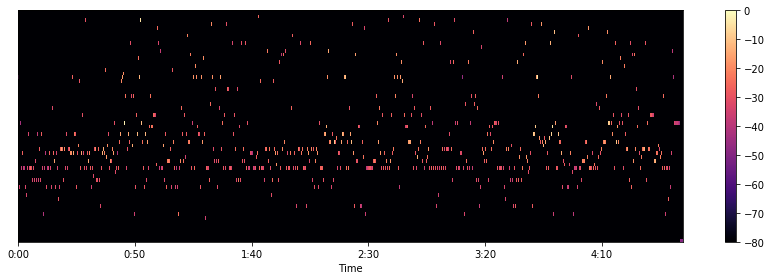

In [128]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(predict, ref=np.max),
                           x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

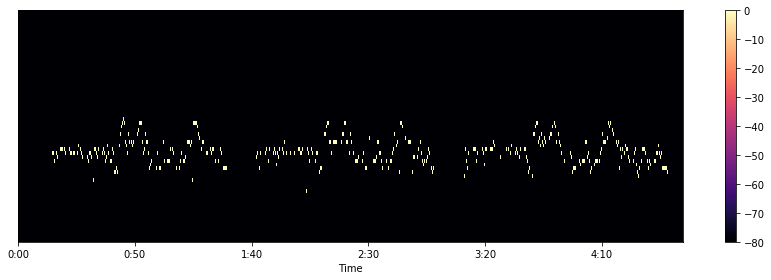

In [191]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(ground_liz, ref=np.max),
                           x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

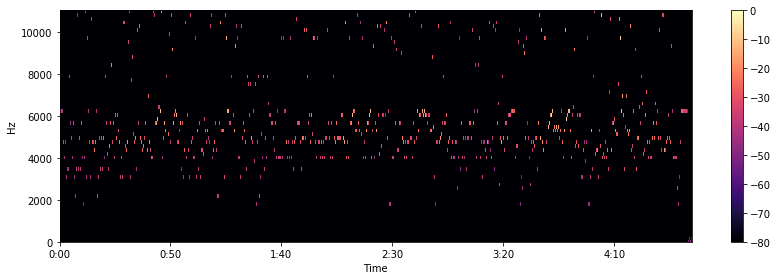

In [28]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(notes_a, ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

In [127]:
predict = np.zeros([61,N])
for j in range(N):
    start =0
    predict[0,j] = np.amax(fund_bad[0:start+2+1,j])
    i=1
    start = i*5
    while start < 60*5:
        predict[i,j] = np.amax(fund_bad[start-2:start+2+1,j])
        i+=1
        start = i*5
    predict[i,j] = np.amax(fund_bad[start-2:start,j])

In [169]:
predict2 = np.zeros([61,N])
for j in range(N):
    start =0
    predict2[0,j] = np.amax(fund_bad[0:start+2+1,j])
    i=1
    start = i*5
    while start < 60*5:
        predict2[i,j] = np.amax(fund_bad[start-2:start+2+1,j])
        if np.amax(fund_bad[start-2:start+2+1,j]) < 6.8:
            predict2[i,j] = 0
        i+=1
        start = i*5
    predict2[i,j] = np.amax(fund_bad[start-2:start,j])

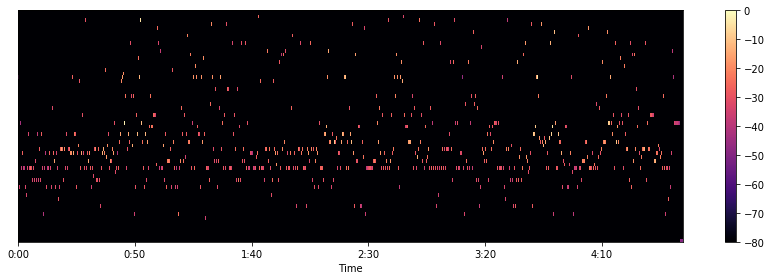

In [128]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(predict, ref=np.max),
                           x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

In [130]:
import h5py

In [131]:
H0 = h5py.File('/mnt/Stuff/Acads/UGP/ismir2018_dominant_melody_estimation/SF-NMF/liz.h5','r')
HF0_a = H0['HF0']

In [132]:
HF0_a.shape

(301, 24540)

In [133]:
N

24540

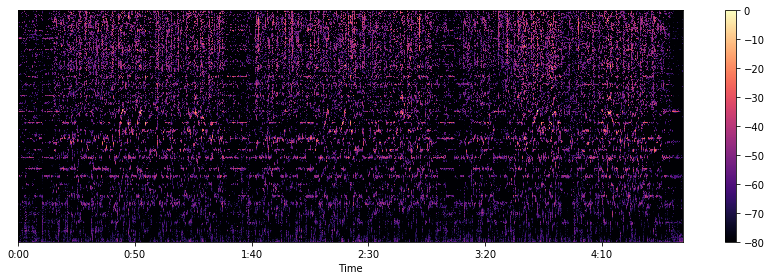

In [200]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(HF0_a, ref=np.max),
                           x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

In [134]:
fund_bad_a = np.zeros([U,N])
for i in range(N):
    m = np.amax(HF0_a[:,i])
    mi = np.argwhere(HF0_a[:,i] == m)
    for x in mi:
        fund_bad_a[x,i] = m

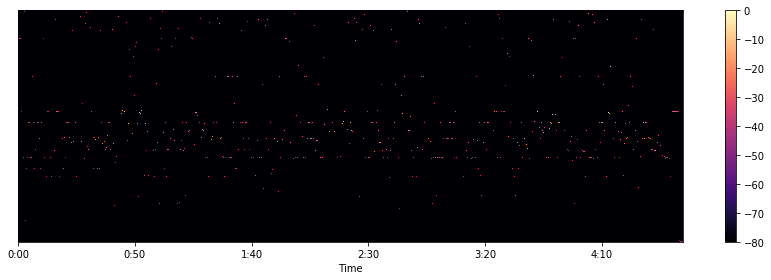

In [202]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(fund_bad_a, ref=np.max),
                           x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

In [26]:
fund_a = np.zeros([U,N])
for i in range(N):
    start=0
    win = 60
    while start < 300:
        m = np.amax(HF0_a[start:start + win,i])
        mi = np.argwhere(HF0_a[start:start + win,i] == m)
        for x in mi:
            fund_a[start + x,i] = m
        start = start+win

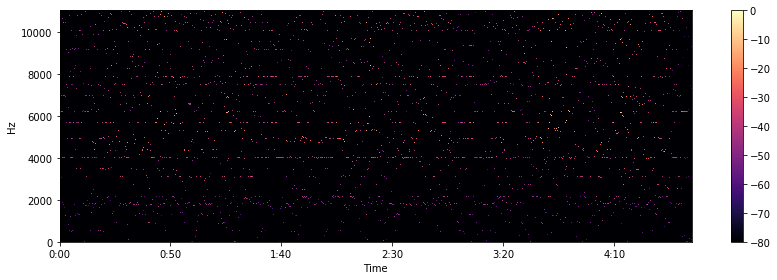

In [28]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(fund_a, ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

In [135]:
notes_a = np.zeros([61,N])
for j in range(N):
    start =0
    notes_a[0,j] = np.amax(fund_bad_a[0:start+2+1,j])
    i=1
    start = i*5
    while start < 60*5:
        notes_a[i,j] = np.amax(fund_bad_a[start-2:start+2+1,j])
        i+=1
        start = i*5
    notes_a[i,j] = np.amax(fund_bad_a[start-2:start,j])

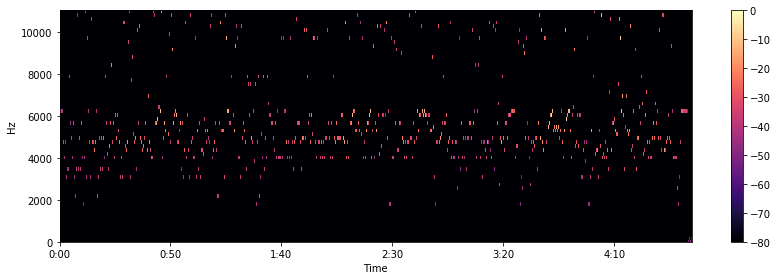

In [28]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.power_to_db(notes_a, ref=np.max),
                           y_axis='linear',x_axis='time', sr=sr,hop_length=256)
plt.colorbar()
plt.tight_layout()

evaluation metric # 1 mean squared error over time

In [239]:
av0=0
av1=0
acc_a = 0
n=N
for i in range(N):
    min = np.max
    #for j in range(61):
    pr = np.nonzero(notes_a[:,i])[0]
    if pr.size == 0:
        if gl[i]==0:
            acc_a+=1
        continue
#     if notes_a[:,i][pr[0]] >1000:
#         if gl[i]==0:
#             acc+=1
#         continue
    x = np.min((pr - gl[i])**2)
    if x == 9 :
        acc_a+=1
    if gl[i]==0:
        av0 = av0 + notes_a[:,i][pr[0]]
        acc+=0
        n-=1
    else:
        av1 = av1 + notes_a[:,i][pr[0]] 
    
#     if gl[i]==0:
#         acc_a+=0
#         n-=1

In [240]:
acc_a/n

0.5631333093783687

In [245]:
acc = 0
mm=0
n=N
av0=0
av1=0
for i in range(N):
    min = np.max
    #for j in range(61):
    pr = np.nonzero(predict[:,i])[0]
    
    if pr.size == 0:
        if gl[i] == 0:
            acc +=1
        continue
    if pr.size >1:
        mm+=1
#     #print(predict[:,i][pr[0]])
#     if predict[:,i][pr[0]] < 6.8:
#         if gl[i]==0:
#             acc+=1
#         continue
    x = np.min((pr - gl[i])**2)
    if x == 0:
        acc+=1
    
    if gl[i]==0:
        av0 = av0 + predict[:,i][pr[0]]
        acc+=0
        n-=1
    else:
        av1 = av1 + predict[:,i][pr[0]] 
    

In [246]:
acc/n

0.5155019151550192

In [222]:
av0/(N-n)

0.5563919521540855

In [123]:
mm

0

In [221]:
av1/n

5.781490846706928